# Лабораторная работа №4

## Задание:

Разработать программу на языке высокого уровня, реализующую выделение максимальной связной компоненты в данном неориентированном графе. На вход в программу поступает файл, содержащий списки смежностей вершин в формате CSV, на выходе программа должна давать списки смежностей связной компоненты в анологичном формате

In [1]:
import random
import graphviz
import csv
file_open = "graph.csv"
file_wr = "result.csv"

In [2]:
def SCC(graph):
    index_counter = [0]
    stack = []
    lowlinks = {}
    index = {}
    result = []
    def strongconnect(node):
        index[node] = index_counter[0]
        lowlinks[node] = index_counter[0]
        index_counter[0]+=1
        stack.append(node)
        try:
            succ = graph[node]
        except:
            succ = []
        for s in succ:
            if s not in lowlinks:
                strongconnect(s)
                lowlinks[node] = min(lowlinks[node], lowlinks[s])
            elif s in stack:
                lowlinks[node] = min(lowlinks[node], index[s])
        if lowlinks[node] == index[node]:
            connected_component = []
            while True:
                s = stack.pop()
                connected_component.append(s)
                if s == node: break
            component = tuple(connected_component)
            result.append(component)
    for node in graph:
        if node not in lowlinks:
            strongconnect(node)
    return result 

In [3]:
def csvreader(FILENAME):
    adj = {}
    with open(FILENAME) as file:
        reader = csv.reader(file)
        for row in reader:
            st = int(row[0])
            adj[st] = []
            for a in row[1:]:
                adj[st].append(int(a))
    return adj

In [4]:
def stdgrviz(adj):
    graph = graphviz.Digraph() 
    for a in adj.keys():
        for b in adj[a]:
            graph.edge(str(a),str(b))
    return graph

In [5]:
def csvreswrite(result, FILENAME):
    with open(FILENAME, "w", newline="") as file:
        wr = csv.writer(file)    
        for a in result:
            Time = []
            for b in a:
                try:
                    st = int(b)
                    Time.append(b)
                except:
                    continue
            wr.writerow(Time)   

Максимально связанные компоненты:
[(3,), (6, 5, 2, 1, 4, 0)]


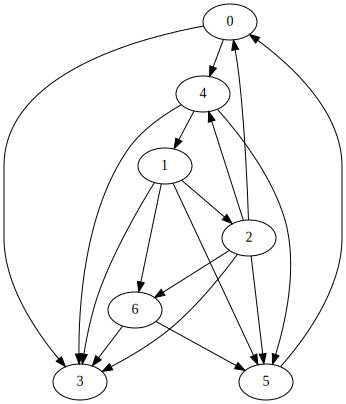

In [6]:
adj = csvreader(file_open)
#print(adj)
result = SCC(adj)
print("Максимально связанные компоненты:")
print(result)
csvreswrite(result,file_wr)
graph = stdgrviz(adj)
graph